# 순차적 데이터(sequential data)
- 순서를 가진 데이터
    - 순서가 중요
    - 가변적 길이
    - 텍스트, 음성, 동영상, 기온, 가격 등


```
밥 대신 떡볶이
떡볶이 대신 밥
```

# 순환신경망(Recurrent Neural Networks)
- 이전 단계의 처리 결과가 다음 단계에 입력이 되는 형태의 신경망
- 순환 신경망은 가중치를 공유한다!
- 순환신경망에 구성되는 뉴런들을 셀(cell)이라고 한다.

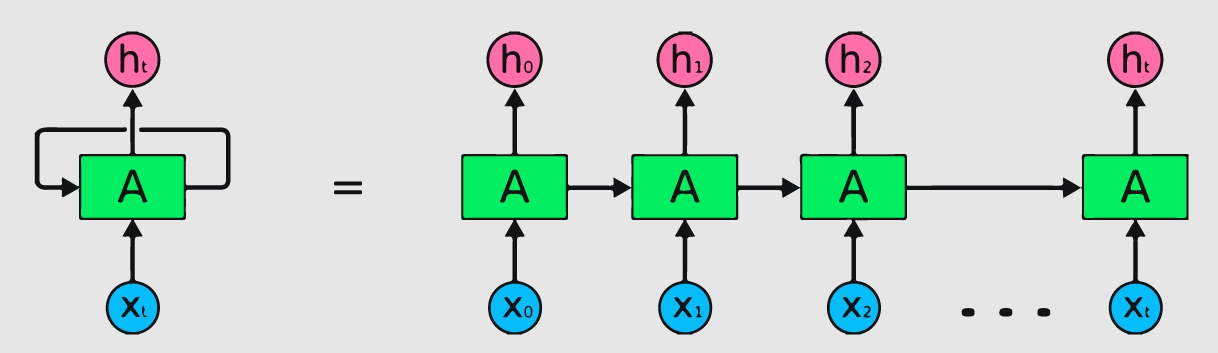

$$
h_t = \tanh(x_t W_{ih}^T + b_{ih} + h_{t-1}W_{hh}^T + b_{hh})
$$


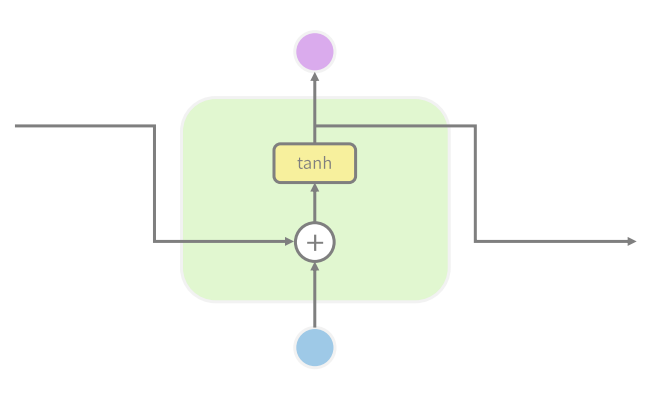

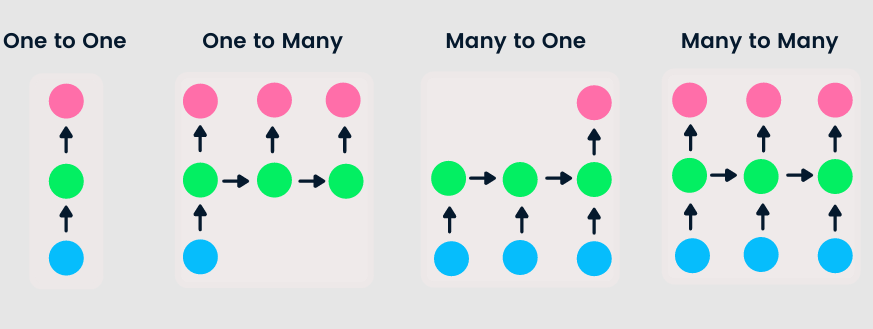

# Vanilla RNN 문제점
- 사라지는 경사
- 장기 의존 관계를 잘 학습할 수 없음


# LSTM(Long Short Term Memory)
- 순환신경망의 사라지는 경사 문제를 해결
- LSTM의 핵심은 cell state

네, 셀 상태(Cell State)는 전체적인 정보를 가지고 있고, 은닉 상태(Hidden State)는 과거에서 현재까지 변형된 압축된 정보를 가지고 있다고 이해할 수 있습니다.

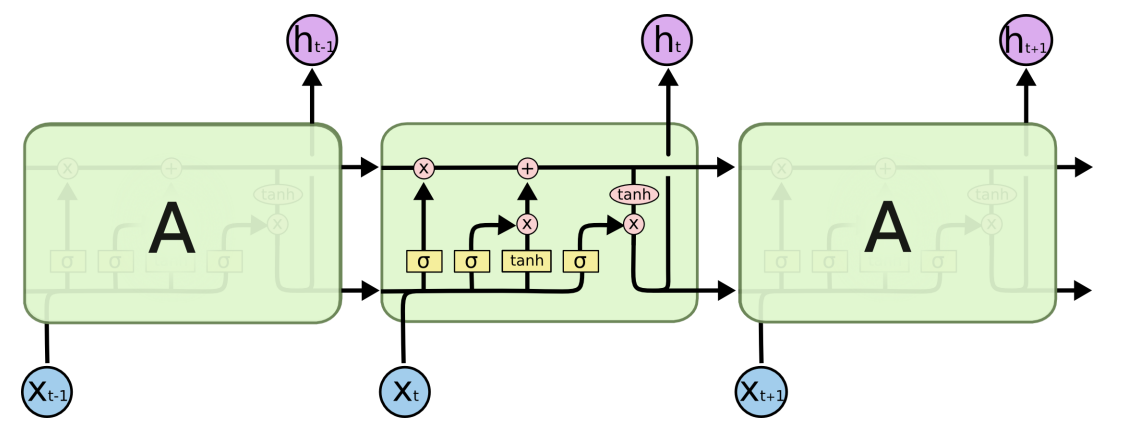

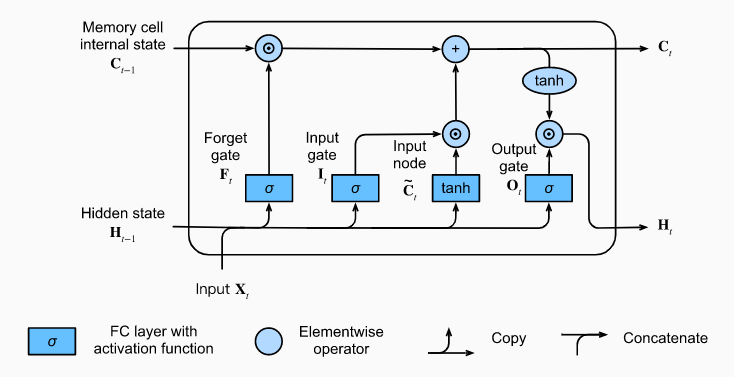

In [1]:
import numpy as np

# 두 행렬 정의
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# 행렬곱
C = np.dot(A, B)

print("행렬곱 (A * B):")
print(C)


행렬곱 (A * B):
[[19 22]
 [43 50]]


In [3]:
import numpy as np

# 두 행렬 정의
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Hadamard 곱
D = A * B  # 또는 np.multiply(A, B)

print("아다마르 곱(Hadamard) (A ⊙ B):")
print(D)


아다마르 곱(Hadamard) (A ⊙ B):
[[ 5 12]
 [21 32]]


### forget gate
- 과거 정보를 얼마나 잊을지에 대한 단계
$$
\begin{split}\begin{aligned}
\mathbf{F}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xf} + \mathbf{H}_{t-1} \mathbf{W}_{hf} + \mathbf{b}_f)
\end{aligned}\end{split}
$$




## input gate
- 현재 정보를 얼마나 기억할 것인지에 대한 단계
$$
\begin{split}\begin{aligned}
\mathbf{I}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xi} + \mathbf{H}_{t-1} \mathbf{W}_{hi} + \mathbf{b}_i)
\end{aligned}\end{split}
$$
$$
\tilde{\mathbf{C}}_t = \text{tanh}(\mathbf{X}_t \mathbf{W}_{xc} + \mathbf{H}_{t-1} \mathbf{W}_{hc} + \mathbf{b}_c)
$$


## output gate
- 다음 cell로 전달되는 output(hidden state)을 구하는 단계
$$
\begin{split}\begin{aligned}
\mathbf{O}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xo} + \mathbf{H}_{t-1} \mathbf{W}_{ho} + \mathbf{b}_o)
\end{aligned}\end{split}
$$


# GRU(Gated Recurrent Unit)
```
2014년도 발표, 조경현박사님 논문으로 제안
```

- LSTM 을 간소화
- 은닉상태만을 사용
- reset gate
  - 이전 hidden sate의 정보를 얼마나 잊을 지를 결정하는 Gate
- update gate
  - 현재 셀에 현재 정보를 얼마만큼 반영할 지를 결정하는 Gate

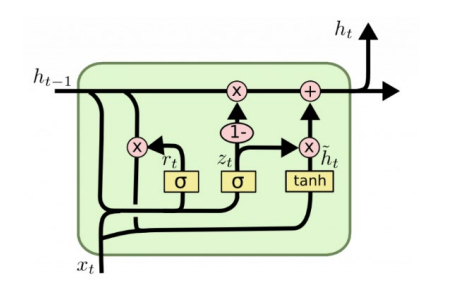

In [4]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random
import os

In [5]:
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

- pandas datareader 라이브러리
    - api를 사용하지 않고 쉽게 주식데이터를 가져올 수 있는 라이브러리
    - https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [3]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   -------------- ------------------------- 41.0/109.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00


In [7]:
import pandas_datareader.data as web
df_1 = web.DataReader('005930', 'naver', start='2022-01-01', end='2022-12-31')
df_2 = web.DataReader('005930', 'naver', start='2023-01-01', end='2023-12-31')
df_1,df_2

(             Open   High    Low  Close    Volume
 Date                                            
 2022-01-03  79400  79800  78200  78600  13502112
 2022-01-04  78800  79200  78300  78700  12427416
 2022-01-05  78800  79000  76400  77400  25470640
 2022-01-06  76700  77600  76600  76900  12931954
 2022-01-07  78100  78400  77400  78300  15163757
 ...           ...    ...    ...    ...       ...
 2022-12-23  58200  58400  57700  58100   9829407
 2022-12-26  58000  58100  57700  57900   6756411
 2022-12-27  58000  58400  57900  58100  10667027
 2022-12-28  57600  57600  56400  56600  14665410
 2022-12-29  56000  56200  55300  55300  11295935
 
 [246 rows x 5 columns],
              Open   High    Low  Close    Volume
 Date                                            
 2023-01-02  55500  56100  55200  55500  10031448
 2023-01-03  55400  56000  54500  55400  13547030
 2023-01-04  55700  58000  55600  57800  20188071
 2023-01-05  58200  58800  57600  58200  15682826
 2023-01-06  58300  594

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2022-01-03 to 2022-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    246 non-null    object
 1   High    246 non-null    object
 2   Low     246 non-null    object
 3   Close   246 non-null    object
 4   Volume  246 non-null    object
dtypes: object(5)
memory usage: 11.5+ KB


In [9]:
# 중요
df_1 = df_1.astype(int)
df_2 = df_2.astype(int)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2022-01-03 to 2022-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    246 non-null    int32
 1   High    246 non-null    int32
 2   Low     246 non-null    int32
 3   Close   246 non-null    int32
 4   Volume  246 non-null    int32
dtypes: int32(5)
memory usage: 6.7 KB


In [10]:
df_1.head(50)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,79400,79800,78200,78600,13502112
2022-01-04,78800,79200,78300,78700,12427416
2022-01-05,78800,79000,76400,77400,25470640
2022-01-06,76700,77600,76600,76900,12931954
2022-01-07,78100,78400,77400,78300,15163757
2022-01-10,78100,78100,77100,78000,9947422
2022-01-11,78400,79000,78000,78900,13221123
2022-01-12,79500,79600,78600,78900,11000502
2022-01-13,79300,79300,77900,77900,13889401


- numpy 배열로 변경

In [30]:
data_1 = df_1.to_numpy()
data_2 = df_2.to_numpy()

data_1.shape

(246, 5)

- minmax 스케일링

In [31]:
print(f'min: {data_1.min(axis=0)}, max: {data_1.max(axis=0)}') # 5개의 피처의 최소, 최대값

min: [  52300   53600   51800   52600 5767902], max: [   79500    79800    78600    78900 37943357]


In [32]:
mins = data_1.min(axis=0)
sizes = data_1.max(axis=0) - mins
sizes

array([   27200,    26200,    26800,    26300, 32175455])

- 딥러닝 모델에서 학습할 시계열 데이터 전처리
    - x와 y를 반복 과정에서 추출하는 방식

In [33]:
x_list = []
y_list = []
count =0
for i in range(10,data_1.shape[0]+1):
    x = data_1[i-10:i]
    y = data_1[i:i+3,3]
    
    x_list.append(x) # 10일의 피처값들
    y_list.append(y) # 
    
    #print(i)
    count+=1
x_list[0],y_list[0] # 첫 스타트는 10일의 종가

(array([[   79400,    79800,    78200,    78600, 13502112],
        [   78800,    79200,    78300,    78700, 12427416],
        [   78800,    79000,    76400,    77400, 25470640],
        [   76700,    77600,    76600,    76900, 12931954],
        [   78100,    78400,    77400,    78300, 15163757],
        [   78100,    78100,    77100,    78000,  9947422],
        [   78400,    79000,    78000,    78900, 13221123],
        [   79500,    79600,    78600,    78900, 11000502],
        [   79300,    79300,    77900,    77900, 13889401],
        [   77700,    78100,    77100,    77300, 10096725]]),
 array([77500, 77000, 76300]))

In [34]:
count

237

In [35]:
df_1[:13]

# 2022-01-17	77600	77800	76900	77500	8785122
# 2022-01-18	77600	77800	76600	77000	9592788
# 2022-01-19	76500	76900	76100	76300	10598290

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,79400,79800,78200,78600,13502112
2022-01-04,78800,79200,78300,78700,12427416
2022-01-05,78800,79000,76400,77400,25470640
2022-01-06,76700,77600,76600,76900,12931954
2022-01-07,78100,78400,77400,78300,15163757
2022-01-10,78100,78100,77100,78000,9947422
2022-01-11,78400,79000,78000,78900,13221123
2022-01-12,79500,79600,78600,78900,11000502
2022-01-13,79300,79300,77900,77900,13889401


In [48]:
df_2.Low

Date
2023-01-02    55200
2023-01-03    54500
2023-01-04    55600
2023-01-05    57600
2023-01-06    57900
              ...  
2023-12-21    74300
2023-12-22    75400
2023-12-26    75700
2023-12-27    76500
2023-12-28    77500
Name: Low, Length: 245, dtype: int32

In [95]:
np.array(x_list).ndim,np.array(x_list).shape

(3, (237, 10, 5))

In [38]:
y_list

[array([77500, 77000, 76300]),
 array([77000, 76300, 76500]),
 array([76300, 76500, 75600]),
 array([76500, 75600, 75100]),
 array([75600, 75100, 74000]),
 array([75100, 74000, 73300]),
 array([74000, 73300, 71300]),
 array([73300, 71300, 73300]),
 array([71300, 73300, 73300]),
 array([73300, 73300, 74000]),
 array([73300, 74000, 73000]),
 array([74000, 73000, 73500]),
 array([73000, 73500, 74700]),
 array([73500, 74700, 75400]),
 array([74700, 75400, 74900]),
 array([75400, 74900, 73700]),
 array([74900, 73700, 73700]),
 array([73700, 73700, 74800]),
 array([73700, 74800, 75000]),
 array([74800, 75000, 74300]),
 array([75000, 74300, 74200]),
 array([74300, 74200, 73400]),
 array([74200, 73400, 73000]),
 array([73400, 73000, 71500]),
 array([73000, 71500, 71900]),
 array([71500, 71900, 72100]),
 array([71900, 72100, 71700]),
 array([72100, 71700, 72900]),
 array([71700, 72900, 71500]),
 array([72900, 71500, 70100]),
 array([71500, 70100, 69500]),
 array([70100, 69500, 71200]),
 array([

In [39]:
def transform_data(data, seq_len = 10, pred_len = 5):
    mins = data.min(axis=0)
    sizes = data.max(axis=0) - mins
    data = (data - mins) / sizes # 스케일링
    x_list = []
    y_list = []
    for i in range(seq_len, data.shape[0]+1 - pred_len ):
        x = data[i-seq_len:i] # 입력 데이터
        y = data[i:i+pred_len,3] # 정답데이터

        x_list.append(x)
        y_list.append(y)

    x_arr = np.array(x_list)
    y_arr = np.array(y_list)

    return x_arr, y_arr

In [45]:
train_x_arr,train_y_arr = transform_data(data_1,pred_len=5) 

# 0 - 245 + 1 = 246 - 5 = 232
train_x_arr.shape, train_y_arr.shape,train_y_arr

((232, 10, 5),
 (232, 5),
 array([[0.94676806, 0.92775665, 0.90114068, 0.90874525, 0.87452471],
        [0.92775665, 0.90114068, 0.90874525, 0.87452471, 0.85551331],
        [0.90114068, 0.90874525, 0.87452471, 0.85551331, 0.81368821],
        ...,
        [0.20532319, 0.24714829, 0.20912548, 0.20152091, 0.20912548],
        [0.24714829, 0.20912548, 0.20152091, 0.20912548, 0.15209125],
        [0.20912548, 0.20152091, 0.20912548, 0.15209125, 0.1026616 ]]))

In [46]:
print(df_1.dtypes)
print(df_2.dtypes)


Open      int32
High      int32
Low       int32
Close     int32
Volume    int32
dtype: object
Open      int32
High      int32
Low       int32
Close     int32
Volume    int32
dtype: object


In [47]:
print(train_x_arr.dtype)
print(train_y_arr.dtype)


float64
float64


- 데이터셋 클래스 만들기

- 회귀 문제의 특성:

- 회귀 문제는 연속적인 값을 예측하는 문제입니다. 예를 들어, 주택 가격, 온도, 또는 판매량과 같은 값들은 정수 뿐만 아니라 소수점 값을 가질 수 있습니다. 따라서, 모델의 예측값과 실제값 모두 소수형 데이터로 표현되는 것이 자연스럽습니다.

-  손실 함수:
회귀 문제에서 자주 사용되는 손실 함수들(예: 평균 제곱 오차(MSE), 평균 절대 오차(MAE) 등)은 소수형 값을 입력으로 받습니다. 이러한 손실 함수들은 예측값과 실제값의 차이를 계산하는데, 이 차이는 일반적으로 소수점 이하의 값을 포함할 수 있습니다.

- 모델의 예측:
회귀 모델의 출력값도 소수형이어야 합니다. 모델이 연속적인 값을 예측하므로, 출력층의 활성화 함수나 출력 값은 소수형이어야 합니다.

In [51]:
class FinanceDataset(torch.utils.data.Dataset):
    def __init__(self, x, y = None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        item["x"] = torch.Tensor( self.x[idx] )
        if self.y is not None:
            item["y"] = torch.Tensor( self.y[idx] )
        return item

In [54]:
class FinanceDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        if self.y is not None:
            return {
                "x": torch.Tensor(self.x[idx]),
                "y": torch.Tensor(self.y[idx])
            }
        else:
            return {
                "x": torch.Tensor(self.x[idx])
            }
    

In [55]:
dt = FinanceDataset(train_x_arr,train_y_arr)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[[0.9963, 1.0000, 0.9851, 0.9886, 0.2404],
          [0.9743, 0.9771, 0.9888, 0.9924, 0.2070],
          [0.9743, 0.9695, 0.9179, 0.9430, 0.6124],
          [0.8971, 0.9160, 0.9254, 0.9240, 0.2227],
          [0.9485, 0.9466, 0.9552, 0.9772, 0.2920],
          [0.9485, 0.9351, 0.9440, 0.9658, 0.1299],
          [0.9596, 0.9695, 0.9776, 1.0000, 0.2316],
          [1.0000, 0.9924, 1.0000, 1.0000, 0.1626],
          [0.9926, 0.9809, 0.9739, 0.9620, 0.2524],
          [0.9338, 0.9351, 0.9440, 0.9392, 0.1345]],
 
         [[0.9743, 0.9771, 0.9888, 0.9924, 0.2070],
          [0.9743, 0.9695, 0.9179, 0.9430, 0.6124],
          [0.8971, 0.9160, 0.9254, 0.9240, 0.2227],
          [0.9485, 0.9466, 0.9552, 0.9772, 0.2920],
          [0.9485, 0.9351, 0.9440, 0.9658, 0.1299],
          [0.9596, 0.9695, 0.9776, 1.0000, 0.2316],
          [1.0000, 0.9924, 1.0000, 1.0000, 0.1626],
          [0.9926, 0.9809, 0.9739, 0.9620, 0.2524],
          [0.9338, 0.9351, 0.9440, 0.9392, 0.1345],
    

In [56]:
batch["x"].shape # batch, seq, feature

torch.Size([2, 10, 5])

In [57]:
batch["y"].shape # 두개가 맞아야함, 사실 안 맞아도 상관은 없지만...

torch.Size([2, 5])

# LSTM Layer

- input_size : 피쳐 개수(첫번째 인수)
- hidden_size : 은닉상태 h의 피쳐수(두번째 인수)
- batch_first : 입력데이터가 batch 먼저일경우 True 줄것, 기본값 False


네, 셀 상태(Cell State)는 전체적인 정보를 가지고 있고, 은닉 상태(Hidden State)는 과거에서 현재까지 변형된 압축된 정보를 가지고 있다고 이해할 수 있습니다.

In [28]:
batch["x"][-1] #seq 10 feat 5

tensor([[0.9743, 0.9771, 0.9888, 0.9924, 0.2070],
        [0.9743, 0.9695, 0.9179, 0.9430, 0.6124],
        [0.8971, 0.9160, 0.9254, 0.9240, 0.2227],
        [0.9485, 0.9466, 0.9552, 0.9772, 0.2920],
        [0.9485, 0.9351, 0.9440, 0.9658, 0.1299],
        [0.9596, 0.9695, 0.9776, 1.0000, 0.2316],
        [1.0000, 0.9924, 1.0000, 1.0000, 0.1626],
        [0.9926, 0.9809, 0.9739, 0.9620, 0.2524],
        [0.9338, 0.9351, 0.9440, 0.9392, 0.1345],
        [0.9301, 0.9237, 0.9366, 0.9468, 0.0938]])

# outputs.shape:

- 주석: "각 셀에 hidden state , shape: seq, batch, feature 각 시점의 값"
설명: 맞습니다. outputs는 LSTM의 모든 시점에서의 hidden state를 포함합니다. 따라서 outputs의 shape은 (sequence_length, batch_size, feature_size)입니다. 여기서 sequence_length는 입력 시퀀스의 길이, batch_size는 배치 크기, feature_size는 LSTM의 hidden state의 차원입니다.

- 팁:
    - 시퀀스 모델링: 모든 시점의 hidden state를 포함하므로, 각 시점의 출력을 활용하여 시퀀스의 전체적인 패턴을 분석할 수 있습니다. 예를 들어, 시퀀스 내 모든 시점의 정보가 필요한 경우나 attention 메커니즘을 적용할 때 유용합니다.

    - 특징 추출: 시퀀스의 각 시점에서의 feature를 추출하여 후속 레이어에서 처리하거나, 특정 시점에서의 hidden state를 추출하여 중요한 정보를 파악하는 데 사용될 수 있습니다.

    - 시각화: 각 시점의 hidden state를 시각화하여 시퀀스의 동적 변화와 LSTM 모델이 학습하는 패턴을 시각적으로 분석할 수 있습니다.

# hn.shape:

- 주석: "마지막 셀에 hidden state, shape: n_layer, batch, feature 마지막 히든만 있음(모든 정보를 가지고 있는)"
설명: 부분적으로 맞습니다. hn은 LSTM의 마지막 시점에서의 hidden state를 포함하며, shape은 (num_layers, batch_size, hidden_size)입니다. 여기서 num_layers는 LSTM 레이어의 수, batch_size는 배치 크기, hidden_size는 LSTM의 hidden state의 차원입니다. 모든 정보를 가지고 있는 것이 아니라, hn은 시퀀스의 마지막 시점에서의 hidden state입니다.

- 팁:
    - 시퀀스 요약: 마지막 시점의 hidden state는 시퀀스의 최종적인 요약을 제공하므로, 시퀀스 전체에 대한 정보를 기반으로 한 예측이나 결정에 유용합니다. 예를 들어, 시퀀스의 마지막 상태를 기반으로 시퀀스 분류 문제를 해결할 때 사용됩니다.

    - 초기 상태: 시퀀스 모델에서 다음 시퀀스를 처리할 때, 이전 시퀀스의 마지막 hidden state를 초기 상태로 
    사용하여 연속적인 시퀀스 처리를 가능하게 합니다.

    - 학습 및 평가: 모델의 마지막 hidden state는 시퀀스의 최종적인 특성을 학습하고 평가하는 데 사용될 수 있으며, 특히 시간적 의존성이 중요한 시퀀스 문제에서 유용합니다.

# cn.shape:

- 주석: "마지막 셀에 cell state , shape: n_layer, batch, feature 마지막 셀 정보(비선형성이 없음, 아주 작은 정보(의미 없는 정도))"
설명: cn은 LSTM의 cell state를 나타내며, shape은 (num_layers, batch_size, hidden_size)입니다. cn은 각 LSTM 레이어의 마지막 시점에서의 cell state를 포함합니다. cn은 실제로 LSTM의 메모리 셀에 저장된 값이며, 이 값은 LSTM의 다음 시점으로 전달됩니다. cn이 비선형성을 가지고 있지 않다는 설명은 맞지만, "아주 작은 정보"라고 표현하기보다는 "현재의 상태를 유지하기 위한 값"이라고 하는 것이 더 정확합니다.

- 팁:
    - 메모리 유지: cell state는 LSTM의 메모리 역할을 하며, 시퀀스의 시간에 따라 유지되어야 하는 정보를 
    포함합니다. 이 값을 활용하여 장기 의존성을 유지하거나 다음 시점으로 전달하는 데 유용합니다.

    - 상태 전달: LSTM 모델의 다음 시퀀스나 다음 배치에 cell state를 전달함으로써 장기적인 패턴이나 메모리를 유지할 수 있습니다.

    - 모델 디버깅: cell state의 변화를 분석하여 LSTM 모델의 학습 및 동작을 디버깅할 수 있습니다. 특히, 메모리 셀의 상태 변화를 시각화하거나 분석하여 모델의 성능을 개선하는 데 도움을 줄 수 있습니다.

## 정리
outputs: 모든 시점의 hidden state를 포함. shape은 (sequence_length, batch_size, feature_size).
hn: 마지막 시점에서의 hidden state. shape은 (num_layers, batch_size, hidden_size).
cn: 마지막 시점에서의 cell state. shape은 (num_layers, batch_size, hidden_size).

In [58]:
# batch_first 파라미터가 False에 예시
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16) # 시퀀스를 입력으로 받음

outputs, (hn, cn) = lstm_layer( batch["x"].permute(1,0,2) ) # b, s, f -> s, b ,f

print( outputs.shape ) # 각 셀에 hidden state , shape: seq, batch, feature 각 시점의 값
print( hn.shape ) # 마지막 셀에 hidden state, shape: n_layer, batch, feature 마지막 히든만 있음(모든 정보를 가지고 있는)
print( cn.shape ) # 마지막 셀에 cell state , shape: n_layer, batch, feature 마지막 셀 정보(비선형성이 없음, 아주 작은 정보(의미 없는 정도))

torch.Size([10, 2, 16])
torch.Size([1, 2, 16])
torch.Size([1, 2, 16])


### LSTM의 출력 설명

#### 1. **`outputs`**
- **설명**: 각 시점의 히든 상태 \( H_t \) 값들이 모인 텐서입니다.
- **차원**: `(sequence_length, batch_size, hidden_size)`입니다.
- **예시**: 시퀀스의 길이가 10이라면, `outputs`는 시퀀스의 각 타임스텝에서의 \( H_t \)들을 모두 포함하고 있습니다. 즉, `outputs`의 첫 번째 차원(즉, `sequence_length`)이 시퀀스의 각 시점을 나타내고, 그 시점에서의 LSTM의 히든 상태 벡터들이 저장되어 있습니다.

#### 2. **`hn`** (마지막 히든 상태)
- **설명**: 마지막 시점의 히든 상태 \( H_t \) 값입니다.
- **차원**: `(num_layers * num_directions, batch_size, hidden_size)`입니다.
- **특징**: `hn`은 `outputs`의 마지막 타임스텝에 해당하는 값과 동일합니다. 단, 여기서 `num_layers`와 `num_directions`가 1이 아닌 경우에는 여러 개의 LSTM 층 혹은 양방향 LSTM이 적용된 상황을 반영하게 됩니다.

#### 3. **`cn`** (마지막 셀 상태)
- **설명**: 마지막 시점의 메모리 셀 상태 \( C_t \) 값입니다.
- **차원**: `(num_layers * num_directions, batch_size, hidden_size)`입니다.
- **특징**: `cn`은 모든 시점을 돈 후 마지막 타임스텝의 셀 상태를 나타내며, LSTM의 내부 메모리에 해당합니다.

---

### 정리

- **`outputs`**: 시퀀스 전체에 걸쳐 각 시점별로 LSTM이 계산한 모든 히든 상태 \( H_t \)를 포함합니다.
- **`hn`**: 시퀀스의 마지막 시점에서의 히든 상태 \( H_t \)이며, 이후 레이어나 예측 단계에서 사용될 수 있습니다.
- **`cn`**: 시퀀스의 마지막 시점에서의 메모리 셀 상태 \( C_t \)로, LSTM이 장기 정보를 기억하고 다음에 전달할 때 사용됩니다.

이 구조를 통해 LSTM은 시퀀스 데이터에서 시점 간의 의존성을 학습하고, 중요한 정보는 셀 상태로 유지하면서, 각 시점에서 필요한 정보를 출력합니다.


In [29]:
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16)

outputs, (hn, cn) = lstm_layer( batch["x"].permute(1,0,2) )

In [64]:
out_sq = [{f"{i}번째": out} for i, out in enumerate(outputs)]
out_sq

[{'0번째': tensor([[ 0.0672,  0.0163,  0.0116, -0.0262,  0.0226, -0.0585,  0.1409, -0.0202,
           -0.0023, -0.1367, -0.0539,  0.0338, -0.0207,  0.0641,  0.0932, -0.1244],
          [ 0.0641,  0.0185,  0.0139, -0.0224,  0.0210, -0.0602,  0.1418, -0.0206,
           -0.0005, -0.1374, -0.0550,  0.0333, -0.0195,  0.0640,  0.0918, -0.1233]],
         grad_fn=<UnbindBackward0>)},
 {'1번째': tensor([[ 9.6874e-02,  2.2390e-02,  2.5153e-02, -2.6879e-02,  2.4419e-02,
           -7.8977e-02,  2.0648e-01, -3.9317e-02,  1.9223e-04, -2.0236e-01,
           -7.6219e-02,  4.5669e-02, -1.5347e-02,  1.0321e-01,  1.3078e-01,
           -1.8887e-01],
          [ 1.0901e-01,  7.2876e-03,  7.5630e-03, -5.2197e-02,  3.3115e-02,
           -6.9880e-02,  2.0404e-01, -3.1154e-02, -4.1653e-03, -1.8695e-01,
           -7.9572e-02,  3.4532e-02, -3.0880e-02,  7.4048e-02,  1.4302e-01,
           -2.0367e-01]], grad_fn=<UnbindBackward0>)},
 {'2번째': tensor([[ 0.1253,  0.0079,  0.0149, -0.0502,  0.0311, -0.0754,  0.23

In [65]:
out_sq[-1],hn #마지막 시점의 out과 hn 값은 같음

({'9번째': tensor([[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587, -0.0692,
            0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,  0.1517, -0.2556],
          [ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582, -0.0714,
            0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,  0.1466, -0.2503]],
         grad_fn=<UnbindBackward0>)},
 tensor([[[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587,
           -0.0692,  0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,
            0.1517, -0.2556],
          [ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582,
           -0.0714,  0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,
            0.1466, -0.2503]]], grad_fn=<StackBackward0>))

### 다음 두 출력값에서 마지막 히든 스테이트값과 마지막 output값이 같음을 확인 할 수 있다.

In [66]:
cn #각 배치의 마지막 셀스테이트 값들

tensor([[[ 0.2716,  0.0527,  0.1046, -0.0366,  0.0209, -0.1622,  0.5408,
          -0.1839,  0.0105, -0.7324, -0.2442,  0.1044,  0.0370,  0.3095,
           0.2951, -0.4829],
         [ 0.2622,  0.0568,  0.1135, -0.0260,  0.0141, -0.1656,  0.5423,
          -0.1877,  0.0113, -0.7316, -0.2440,  0.1040,  0.0467,  0.3157,
           0.2860, -0.4730]]], grad_fn=<StackBackward0>)

## batch_first=True

In [67]:
# batch_first 파라미터가 True 에 예시
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16, batch_first=True)

outputs, (hn, cn) = lstm_layer( batch["x"] ) # b, s, f

print( outputs.shape ) # 각 셀에 hidden state , shape: batch, seq, feature
print( hn.shape ) # 마지막 셀에 hidden state, shape: n_layer, batch, feature
print( cn.shape ) # 마지막 셀에 cell state , shape: n_layer, batch, feature

torch.Size([2, 10, 16])
torch.Size([1, 2, 16])
torch.Size([1, 2, 16])


### - num_layers : 반복 레이어수
        - 순환신경망 층을 여러개 쌓을수 있음
    


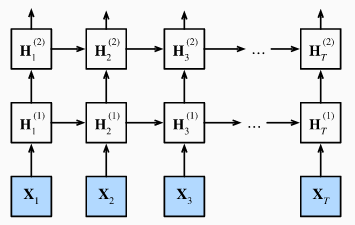

In [68]:
# batch_first 파라미터가 True 에 예시
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16, batch_first=True, num_layers = 2)

outputs, (hn, cn) = lstm_layer( batch["x"] ) # b, s, f

print(train_x_arr.shape)
print( outputs.shape ) # 각 셀에 hidden state , shape: batch, seq, feature
print( hn.shape ) # 마지막 셀에 hidden state, shape: n_layer, batch, feature
print( cn.shape ) # 마지막 셀에 cell state , shape: n_layer, batch, feature

(232, 10, 5)
torch.Size([2, 10, 16])
torch.Size([2, 2, 16])
torch.Size([2, 2, 16])


In [69]:
hn

tensor([[[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587,
          -0.0692,  0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,
           0.1517, -0.2556],
         [ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582,
          -0.0714,  0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,
           0.1466, -0.2503]],

        [[ 0.0069, -0.0504, -0.1600,  0.0564, -0.1759, -0.0288,  0.0286,
          -0.0867,  0.1713,  0.1276,  0.0675, -0.0608, -0.1645,  0.0101,
          -0.0675,  0.0200],
         [ 0.0067, -0.0511, -0.1599,  0.0567, -0.1754, -0.0290,  0.0292,
          -0.0881,  0.1711,  0.1278,  0.0679, -0.0614, -0.1648,  0.0099,
          -0.0675,  0.0212]]], grad_fn=<StackBackward0>)

In [70]:
hn.permute(1,0,2)

tensor([[[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587,
          -0.0692,  0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,
           0.1517, -0.2556],
         [ 0.0069, -0.0504, -0.1600,  0.0564, -0.1759, -0.0288,  0.0286,
          -0.0867,  0.1713,  0.1276,  0.0675, -0.0608, -0.1645,  0.0101,
          -0.0675,  0.0200]],

        [[ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582,
          -0.0714,  0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,
           0.1466, -0.2503],
         [ 0.0067, -0.0511, -0.1599,  0.0567, -0.1754, -0.0290,  0.0292,
          -0.0881,  0.1711,  0.1278,  0.0679, -0.0614, -0.1648,  0.0099,
          -0.0675,  0.0212]]], grad_fn=<PermuteBackward0>)

In [71]:
hn.permute(1,0,2).flatten(1),len(hn.permute(1,0,2).flatten(1)[0])

(tensor([[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587, -0.0692,
           0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,  0.1517, -0.2556,
           0.0069, -0.0504, -0.1600,  0.0564, -0.1759, -0.0288,  0.0286, -0.0867,
           0.1713,  0.1276,  0.0675, -0.0608, -0.1645,  0.0101, -0.0675,  0.0200],
         [ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582, -0.0714,
           0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,  0.1466, -0.2503,
           0.0067, -0.0511, -0.1599,  0.0567, -0.1754, -0.0290,  0.0292, -0.0881,
           0.1711,  0.1278,  0.0679, -0.0614, -0.1648,  0.0099, -0.0675,  0.0212]],
        grad_fn=<UnsafeViewBackward0>),
 32)

In [72]:
hn[-1].shape

torch.Size([2, 16])

In [73]:
outputs[:, -1].shape

torch.Size([2, 16])

In [74]:
hn.shape

torch.Size([2, 2, 16])

In [75]:
hn.permute(1,0,2).shape # batch, n_layer, features

torch.Size([2, 2, 16])

In [76]:
hn.permute(1,0,2).flatten(1).shape

torch.Size([2, 32])

In [77]:
torch.cat([hn[0], hn[-1]],dim=1)

tensor([[ 0.1285,  0.0221,  0.0519, -0.0161,  0.0090, -0.0912,  0.2587, -0.0692,
          0.0041, -0.2669, -0.0894,  0.0428,  0.0157,  0.1539,  0.1517, -0.2556,
          0.0069, -0.0504, -0.1600,  0.0564, -0.1759, -0.0288,  0.0286, -0.0867,
          0.1713,  0.1276,  0.0675, -0.0608, -0.1645,  0.0101, -0.0675,  0.0200],
        [ 0.1246,  0.0238,  0.0563, -0.0114,  0.0061, -0.0934,  0.2582, -0.0714,
          0.0044, -0.2677, -0.0891,  0.0428,  0.0199,  0.1569,  0.1466, -0.2503,
          0.0067, -0.0511, -0.1599,  0.0567, -0.1754, -0.0290,  0.0292, -0.0881,
          0.1711,  0.1278,  0.0679, -0.0614, -0.1648,  0.0099, -0.0675,  0.0212]],
       grad_fn=<CatBackward0>)

In [78]:
torch.cat([hn[0], hn[-1]],dim=1).shape

torch.Size([2, 32])

- bidirectional : 양방향 여부 기본값 False


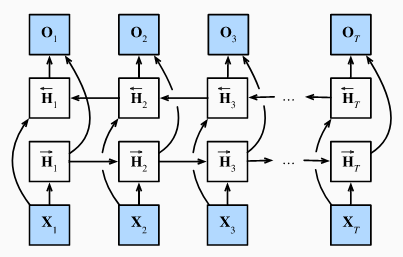

In [79]:
# batch_first 파라미터가 True 에 예시
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16, batch_first=True, bidirectional=True)

outputs, (hn, cn) = lstm_layer( batch["x"] ) # b, s, f

print( outputs.shape ) # 각 셀에 hidden state , shape: batch, seq, feature
print( hn.shape ) # 마지막 셀에 hidden state, shape: n_layer, batch, feature
print( cn.shape ) # 마지막 셀에 cell state , shape: n_layer, batch, feature

torch.Size([2, 10, 32])
torch.Size([2, 2, 16])
torch.Size([2, 2, 16])


In [82]:

lstm_layer = torch.nn.LSTM(train_x_arr.shape[-1], 16, batch_first=True, bidirectional=True)

outputs, (hn, cn) = lstm_layer( batch["x"] ) # b, s, f
outputs.mean(dim=1) # output을 사용한 예시
outputs.reshape(2, -1),outputs.reshape(2, -1).shape

(tensor([[ 3.5709e-02, -2.7929e-02,  6.1280e-02, -1.2306e-01, -9.3922e-04,
           3.4593e-02,  7.5602e-02,  1.1692e-01, -2.3316e-02,  2.2720e-02,
          -5.1411e-03,  2.8490e-02,  1.3141e-01, -4.2740e-02, -3.4412e-02,
          -8.4987e-02,  1.4472e-01, -1.8160e-03, -3.7862e-02, -1.5364e-01,
           1.3290e-01, -2.0588e-01, -1.3185e-01,  1.4338e-01, -9.9625e-03,
          -6.5871e-02,  3.2934e-02, -1.0525e-01,  2.2764e-01,  1.4860e-02,
           6.0319e-02, -7.9778e-02,  4.7192e-02, -5.0672e-02,  9.2441e-02,
          -2.0712e-01, -1.1612e-03,  5.2895e-02,  1.2654e-01,  1.7148e-01,
          -4.2111e-02,  4.1740e-02, -1.8221e-02,  5.2914e-02,  1.7449e-01,
          -5.3812e-02, -5.3282e-02, -1.0161e-01,  1.4226e-01, -1.8913e-03,
          -3.7891e-02, -1.5056e-01,  1.3246e-01, -2.0131e-01, -1.3109e-01,
           1.4340e-01, -5.6547e-03, -6.3690e-02,  3.3321e-02, -1.0510e-01,
           2.2672e-01,  1.6807e-02,  5.6268e-02, -8.1205e-02,  7.3601e-02,
          -6.1712e-02,  1

In [83]:
#batch만 살림 레이어는 전환
hn.permute(1, 0, 2).flatten(1).shape # batch, features

torch.Size([2, 32])

# GRU Layer
- 파라미터 동일하지만 출력에 셀스테이트가 없음

In [84]:
train_x_arr

array([[[0.99632353, 1.        , 0.98507463, 0.98859316, 0.24037609],
        [0.97426471, 0.97709924, 0.98880597, 0.99239544, 0.20697498],
        [0.97426471, 0.96946565, 0.91791045, 0.94296578, 0.61235305],
        ...,
        [1.        , 0.99236641, 1.        , 1.        , 0.16262707],
        [0.99264706, 0.98091603, 0.9738806 , 0.96197719, 0.25241287],
        [0.93382353, 0.9351145 , 0.94402985, 0.9391635 , 0.13453805]],

       [[0.97426471, 0.97709924, 0.98880597, 0.99239544, 0.20697498],
        [0.97426471, 0.96946565, 0.91791045, 0.94296578, 0.61235305],
        [0.89705882, 0.91603053, 0.92537313, 0.92395437, 0.22265581],
        ...,
        [0.99264706, 0.98091603, 0.9738806 , 0.96197719, 0.25241287],
        [0.93382353, 0.9351145 , 0.94402985, 0.9391635 , 0.13453805],
        [0.93014706, 0.92366412, 0.93656716, 0.94676806, 0.09377397]],

       [[0.97426471, 0.96946565, 0.91791045, 0.94296578, 0.61235305],
        [0.89705882, 0.91603053, 0.92537313, 0.92395437, 0.2

In [85]:
train_x_arr.shape,train_x_arr.shape[2]

((232, 10, 5), 5)

In [86]:
gru_layer = torch.nn.GRU(train_x_arr.shape[2], 16 , batch_first=True)
outputs, hn = gru_layer(batch["x"])

print(outputs.mean(dim=1).shape)
print(outputs.shape) # batch, seq, features
print(hn.shape,hn[-1].shape) # n_layer, batch, features

torch.Size([2, 16])
torch.Size([2, 10, 16])
torch.Size([1, 2, 16]) torch.Size([2, 16])


# 모델 만들기

In [141]:
ls=torch.nn.LSTM(batch['x'].shape[-1], 16, bidirectional=True, batch_first=True)
outputs,(hn,cn)=ls(batch['x'])

#print(hn.permute(1,0,2))

hn=hn.permute(1,0,2).flatten(1)
outputs=torch.mean(outputs,axis=1)

print(hn.shape,outputs.shape)

hn*outputs


torch.Size([2, 32]) torch.Size([2, 32])


tensor([[0.0046, 0.0093, 0.0153, 0.0055, 0.0232, 0.0288, 0.0150, 0.0063, 0.0144,
         0.0008, 0.0098, 0.0745, 0.0318, 0.0405, 0.0500, 0.0208, 0.0104, 0.0199,
         0.0046, 0.0465, 0.0454, 0.0364, 0.0423, 0.0114, 0.0167, 0.0010, 0.0263,
         0.0014, 0.0210, 0.0822, 0.0571, 0.0208],
        [0.0045, 0.0090, 0.0147, 0.0057, 0.0239, 0.0290, 0.0146, 0.0061, 0.0144,
         0.0007, 0.0103, 0.0719, 0.0315, 0.0403, 0.0497, 0.0201, 0.0102, 0.0197,
         0.0048, 0.0462, 0.0449, 0.0358, 0.0420, 0.0113, 0.0170, 0.0010, 0.0252,
         0.0014, 0.0206, 0.0811, 0.0565, 0.0209]], grad_fn=<MulBackward0>)

In [179]:
class Bi_net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn_layer = torch.nn.LSTM(input_size, hidden_size, batch_first=True,bidirectional=True)
        self.sq=torch.nn.Sequential(
             torch.nn.Linear(hidden_size*2, hidden_size // 2 ), ##(그냥 줄이려고)
             torch.nn.ReLU(),
             torch.nn.Linear(hidden_size // 2, 2)
        )

    def forward(self, x):

        # outputs : batch, seq, feature
        # hn : n_layer, batch, feature
        outputs, (hn, cn) = self.rnn_layer(x)
        hn=hn.permute(1,0,2)
        x = hn.flatten(1) # batch, feature
        return self.sq(x)

In [180]:
model = Bi_net(train_x_arr.shape[2], 16)
model(batch["x"])

tensor([[-0.1410,  0.1065],
        [-0.1410,  0.1068]], grad_fn=<AddmmBackward0>)

In [182]:
class Net2(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn_layer = torch.nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.hidden_layer = torch.nn.Linear(hidden_size*2, hidden_size)
        self.relu = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(hidden_size, 5)

    def forward(self, x):

        # outputs : batch, seq, feature
        # hn : n_layer, batch, feature , (2, batch, feature)
        outputs, (hn, cn) = self.rnn_layer(x)
        x = hn.permute(1,0,2) # batch, n_layer, feature
        x = x.flatten(1)  # batch , n_layer*feautre
        x = self.hidden_layer(x)
        x = self.relu(x)
        return self.output_layer(x)

In [183]:
model = Net2(train_x_arr.shape[2], 16)
model(batch["x"])

tensor([[ 0.0053,  0.1826, -0.2727, -0.0536,  0.2123],
        [ 0.0068,  0.1825, -0.2738, -0.0529,  0.2112]],
       grad_fn=<AddmmBackward0>)

In [184]:
import torch
import torch.nn as nn

class Resnet_Seqblock_LstmNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Resnet_Seqblock_LstmNet, self).__init__()
        
        # Bidirectional LSTM layer
        self.rnn = nn.LSTM(input_size, hidden_size, bidirectional=True, batch_first=True)
        

        self.sq_block = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size * 2),
            nn.BatchNorm1d(hidden_size * 2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size * 2,hidden_size * 2)  
        )
        
        self.sq_block_list = nn.ModuleList([self.sq_block for _ in range(5)])
        
        # Linear layers to transform and output final predictions
        self.linear1 = nn.Linear(hidden_size * 2, hidden_size * 2)
        self.linear2 = nn.Linear(hidden_size * 2, 5)

    def forward(self, x):
        outputs, (hn, cn) = self.rnn(x)
        
        outputs_mean = outputs.mean(dim=1)
        
        #print(f"outputs_mean: {outputs_mean.shape}")
        
        hn=hn.permute(1,0,2).flatten(1)

        #print(f"hn_last: {hn.shape}")

        outputs_mean=self.linear1(outputs_mean)

        #print(f"outputs_mean: {outputs_mean.shape}")

        #print(f"hn * outputs_mean: {(hn * outputs_mean).shape}")
        for sq_block in self.sq_block_list:
            x = hn * outputs_mean  
            x = sq_block(x)
            #print(f"x: {x.shape}")
            
        x = self.linear2(x)
        

        #print(f"x: {x.shape}")

        return x


In [207]:
model=Resnet_Seqblock_LstmNet(train_x_arr.shape[-1],16)
model

Resnet_Seqblock_LstmNet(
  (rnn): LSTM(5, 16, batch_first=True, bidirectional=True)
  (sq_block): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=32, out_features=32, bias=True)
  )
  (sq_block_list): ModuleList(
    (0-4): 5 x Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): Linear(in_features=32, out_features=32, bias=True)
    )
  )
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=5, bias=True)
)

In [185]:
outputs.shape,outputs.reshape(2, -1).shape,hn.shape,hn[-1].shape #모델 레이어에 들어갈 형태

(torch.Size([2, 10, 16]),
 torch.Size([2, 160]),
 torch.Size([1, 10, 16]),
 torch.Size([10, 16]))

In [186]:
hn,hn[-1] # 차원의 형태를 잘 확인하자

(tensor([[[ 0.0873,  0.1833,  0.2993,  0.0261,  0.0276, -0.1612, -0.1668,
           -0.2183,  0.2083, -0.0082,  0.0845, -0.0217, -0.0946, -0.0138,
            0.1740, -0.0685],
          [ 0.0870,  0.1683,  0.2899,  0.0483,  0.0196, -0.1708, -0.1697,
           -0.2287,  0.2047, -0.0193,  0.0665, -0.0187, -0.0909, -0.0267,
            0.1743, -0.0628],
          [ 0.0852,  0.1679,  0.2829,  0.0478,  0.0208, -0.1606, -0.1659,
           -0.2128,  0.2080, -0.0150,  0.0707, -0.0198, -0.0894, -0.0242,
            0.1751, -0.0651],
          [ 0.0870,  0.1746,  0.2901,  0.0355,  0.0256, -0.1595, -0.1670,
           -0.2134,  0.2072, -0.0107,  0.0789, -0.0221, -0.0917, -0.0159,
            0.1724, -0.0659],
          [ 0.0874,  0.1796,  0.2926,  0.0314,  0.0292, -0.1551, -0.1660,
           -0.2092,  0.2078, -0.0076,  0.0836, -0.0247, -0.0920, -0.0099,
            0.1733, -0.0692],
          [ 0.0877,  0.1810,  0.2966,  0.0268,  0.0289, -0.1584, -0.1668,
           -0.2143,  0.2079, -0.0070

In [187]:
model=Resnet_Seqblock_LstmNet(train_x_arr.shape[-1],16)
model(batch['x'])

tensor([[ 0.1899, -0.1725, -0.1454,  0.0851,  0.0381],
        [ 0.1833, -0.1659, -0.1519,  0.0984,  0.0476]],
       grad_fn=<AddmmBackward0>)

# 학습 loop 함수 만들기

In [188]:
batch["y"] # 모델의 예측값과 y의 값이 갯수가 같은지 확인하기 

tensor([[0.9468, 0.9278, 0.9011, 0.9087, 0.8745],
        [0.9278, 0.9011, 0.9087, 0.8745, 0.8555]])

In [195]:
#학습 데이터를 가지고있다
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    
    for batch in dataloader:
        x, y = batch["x"].to(device), batch["y"].to(device)
        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad() #인스터스 생성시 넘겨받아 주소를 알고 있음 그래서 가능
        loss.backward() # 기울기만 구함,단순 계산된 값만 가지고 있음
        optimizer.step() #가중치만 업데이트>>loss 경사값을 가져온다

        epoch_loss += loss.item() 

    epoch_loss /= len(dataloader)
    return epoch_loss

In [196]:
model=Resnet_Seqblock_LstmNet(batch['x'].shape[-1],16)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam( model.parameters() )
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
train_loop(dl,model,loss_fn,optimizer,device)

0.15502782692833691

# 테스트 loop 함수 만들기

In [197]:
@torch.no_grad()
#@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
#def test_loop(dataloader,model,loss_fn,device)
    epoch_loss = 0
    pred_list = []
    model.eval() # 평가 모드

    for batch in dataloader:
        pred = model( batch["x"].to(device) )

        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환, gpu 온리 탠서
        pred_list.append(pred)

    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

In [198]:
x=np.array([1,1,1])
y=np.array([2,1,2])
np.concatenate((x,y))

array([1, 1, 1, 2, 1, 2])

In [199]:
sample=[]
sample.append([[1,1,1],[2,2,2]]) # [[[1, 1, 1], [2, 2, 2]]]
sample.append([[3,3,3],[4,4,4]]) # [[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]]
sample
np.concatenate(sample) # 차원이 줄어듬 default axis=0

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [200]:
sample=[]
sample.extend([[1,1,1],[2,2,2]]) #,[[3,3,3],[4,4,4]]
sample.extend([[3,3,3],[4,4,4]])
sample
np.concatenate(sample)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

# 하이퍼 파라미터 정의

In [201]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [202]:
n_splits = 5 # k-fold에 k값을 의미
input_size = train_x_arr.shape[2] # 입력 피처 개수
hidden_size = 16 # 순환신경망의 출력 피처 개수
batch_size = 32
epochs = 1000
loss_fn = torch.nn.MSELoss()

In [203]:
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [204]:
mins[3], sizes[3]

(52600, 26300)

In [208]:
is_holdout = False
save_dir="C:\\study\\03_Deep_Learning\\weight\\naver_stock"
import os

os.makedirs(save_dir,exist_ok=True)

best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_x_arr) ):
    # 학습용 데이터
    x_train = train_x_arr[tri]
    y_train = train_y_arr[tri]

    # 검증용 데이터
    x_valid = train_x_arr[vai]
    y_valid = train_y_arr[vai]

    # 학습용 데이터로더 객체
    train_dt = FinanceDataset(x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = FinanceDataset(x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Resnet_Seqblock_LstmNet(input_size, hidden_size).to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    best_score = np.inf # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        true = y_valid * sizes[3] + mins[3] # 원래에 수치로 복원
        pred = pred * sizes[3] + mins[3] # 원래에 수치로 복원
        score = mean_absolute_error(true, pred)

        # print(train_loss, valid_loss, score)
        if score < best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir,f"Resnet_Seqblock_LstmNet_model_{i}(naver_stock).pth")) # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 100:
            break

    print(f"{i}번째 폴드 BEST MAE: {best_score}")
    best_score_list.append(best_score)
    if False:
        break

  0%|          | 0/1000 [00:00<?, ?it/s]

0번째 폴드 BEST MAE: 993.8459607712766


  0%|          | 0/1000 [00:00<?, ?it/s]

1번째 폴드 BEST MAE: 1119.2624335106384


  0%|          | 0/1000 [00:00<?, ?it/s]

2번째 폴드 BEST MAE: 1002.3105638586958


  0%|          | 0/1000 [00:00<?, ?it/s]

3번째 폴드 BEST MAE: 893.4638926630435


  0%|          | 0/1000 [00:00<?, ?it/s]

4번째 폴드 BEST MAE: 885.5276154891304


In [209]:
test_x_arr,test_y_arr = transform_data(data_2,pred_len=5)
test_x_arr.shape, test_y_arr.shape,test_y_arr

((231, 10, 5),
 (231, 5),
 array([[0.24675325, 0.24242424, 0.21645022, 0.26406926, 0.27705628],
        [0.24242424, 0.21645022, 0.26406926, 0.27705628, 0.34632035],
        [0.21645022, 0.26406926, 0.27705628, 0.34632035, 0.36796537],
        ...,
        [0.77922078, 0.83982684, 0.84848485, 0.88744589, 0.91774892],
        [0.83982684, 0.84848485, 0.88744589, 0.91774892, 0.97835498],
        [0.84848485, 0.88744589, 0.91774892, 0.97835498, 1.        ]]))

In [211]:
test_dt = FinanceDataset(test_x_arr)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

mins = data_2.min(axis=0)
sizes = data_2.max(axis=0) - mins

pred_list=[]
for i in range(n_splits):
    model=Resnet_Seqblock_LstmNet(test_x_arr.shape[2],hidden_size).to(device)
    state_dict=torch.load(os.path.join(save_dir, f"Resnet_Seqblock_LstmNet_model_{i}(naver_stock).pth"))
    model.load_state_dict(state_dict)
    _, pred = test_loop(test_dl, model, loss_fn, device)
    pred =pred* sizes[3] + mins[3]
    pred_list.append(pred)

In [212]:
np.array(pred_list).shape
#np.array(pred_list).flatten(1).mean(axis=0)
pred=np.array(pred_list,dtype='float64')
pred_mean=pred.mean(axis=0),pred.mean(axis=0).shape

In [213]:
pred_mean=pred.mean(axis=0).flatten()
pred_mean

array([61720.82890625, 61752.28203125, 61799.36171875, ...,
       73608.3859375 , 73461.6296875 , 73284.0453125 ])

In [214]:
np.array(data_2[:,3]).shape

(245,)

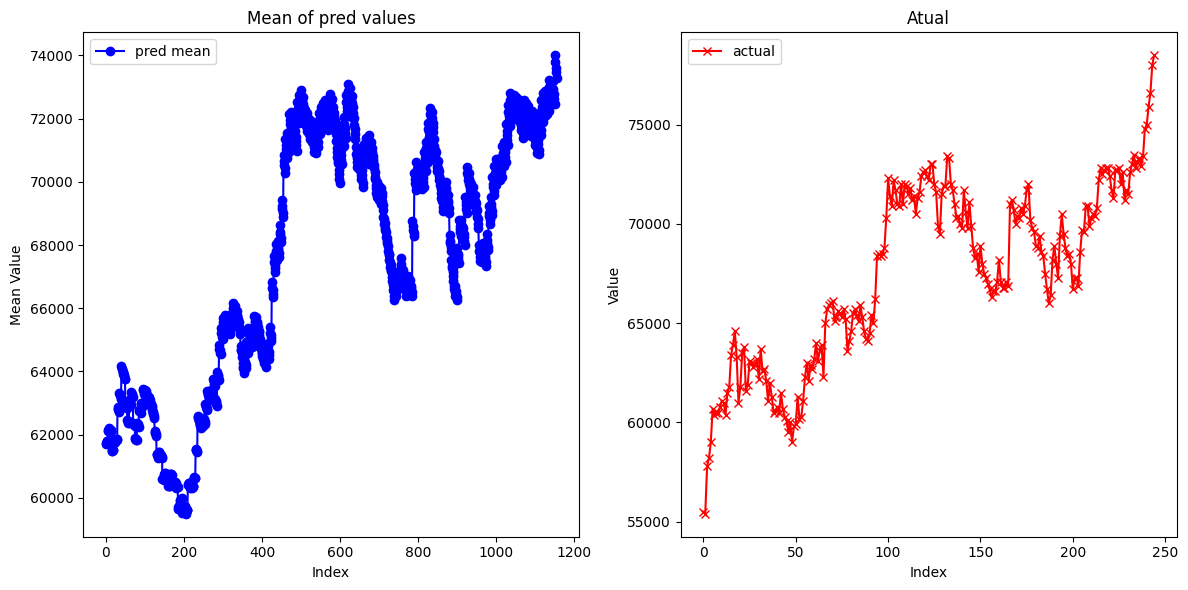

In [216]:
# Resnet_lstm
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 6))

# pred의 평균값 시각화
plt.subplot(1, 2, 1)
plt.plot(pred_mean, marker='o', linestyle='-', color='b', label='pred mean')
plt.title('Mean of pred values')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(data_2[:,3], marker='x', linestyle='-', color='r', label='actual')
plt.title('Atual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


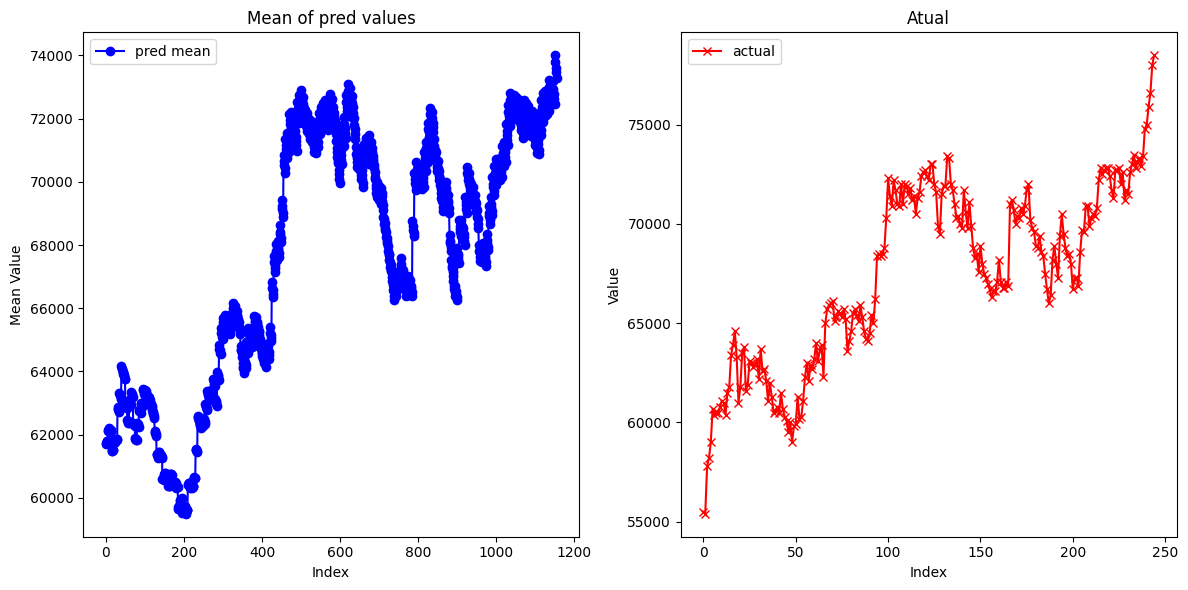

In [217]:
# Bi_net
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 6))

# pred의 평균값 시각화
plt.subplot(1, 2, 1)
plt.plot(pred_mean, marker='o', linestyle='-', color='b', label='pred mean')
plt.title('Mean of pred values')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(data_2[:,3], marker='x', linestyle='-', color='r', label='actual')
plt.title('Atual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [218]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 예제 데이터
# 실제 데이터로 교체
# pred_mean = ... (기존의 pred_mean 사용)
# data_2 = ... (기존의 data_2 사용)

print("pred_mean.shape:", pred_mean.shape)
print("actual.shape:", data_2[:, 3].shape)

# 서브플롯을 생성합니다.
fig = make_subplots(rows=1, cols=3, subplot_titles=("Combined Trend", "Mean of Pred Values", "actual"))

# 첫 번째 서브플롯: 두 데이터의 트렌드 비교
fig.add_trace(go.Scatter(
    x=np.arange(len(pred_mean)),
    y=pred_mean,
    mode='lines+markers',
    name='Pred Mean',
    marker=dict(color='blue'),
    line=dict(width=2)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(data_2[:, 3])),
    y=data_2[:, 3],
    mode='lines+markers',
    name='actual',
    marker=dict(color='red'),
    line=dict(width=2)
), row=1, col=1)

# 두 번째 서브플롯: pred_mean
fig.add_trace(go.Scatter(
    x=np.arange(len(pred_mean)),
    y=pred_mean,
    mode='lines+markers',
    name='Pred Mean',
    marker=dict(color='blue'),
    line=dict(width=2)
), row=1, col=2)

# 세 번째 서브플롯: data_2[:, 3]
fig.add_trace(go.Scatter(
    x=np.arange(len(data_2[:, 3])),
    y=data_2[:, 3],
    mode='lines+markers',
    name='actual',
    marker=dict(color='red'),
    line=dict(width=2)
), row=1, col=3)

# 레이아웃 설정
fig.update_layout(
    title='naver stock Trend Comparison',
    xaxis_title='Index',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_white',
    showlegend=True  # 범례를 표시
)

# 서브플롯마다 범례 추가
fig.update_xaxes(title_text="Index", row=1, col=1)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Index", row=1, col=2)
fig.update_yaxes(title_text="Value", row=1, col=2)
fig.update_xaxes(title_text="Index", row=1, col=3)
fig.update_yaxes(title_text="Value", row=1, col=3)

# 그래프 표시
fig.show()


pred_mean.shape: (1155,)
actual.shape: (245,)


In [219]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 예제 데이터
# 실제 데이터로 교체
# pred_mean = ... (기존의 pred_mean 사용)
# data_2 = ... (기존의 data_2 사용)

print("pred_mean.shape:", pred_mean.shape)
print("actual.shape:", data_2[:, 3].shape)

# 서브플롯을 생성합니다.
fig = make_subplots(rows=1, cols=3, subplot_titles=("Combined Trend", "Mean of Pred Values", "actual"))

# 첫 번째 서브플롯: 두 데이터의 트렌드 비교
fig.add_trace(go.Scatter(
    x=np.arange(len(pred_mean)),
    y=pred_mean,
    mode='lines+markers',
    name='Pred Mean',
    marker=dict(color='blue'),
    line=dict(width=2)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(data_2[:, 3])),
    y=data_2[:, 3],
    mode='lines+markers',
    name='actual',
    marker=dict(color='red'),
    line=dict(width=2)
), row=1, col=1)

# 두 번째 서브플롯: pred_mean
fig.add_trace(go.Scatter(
    x=np.arange(len(pred_mean)),
    y=pred_mean,
    mode='lines+markers',
    name='Pred Mean',
    marker=dict(color='blue'),
    line=dict(width=2)
), row=1, col=2)

# 세 번째 서브플롯: data_2[:, 3]
fig.add_trace(go.Scatter(
    x=np.arange(len(data_2[:, 3])),
    y=data_2[:, 3],
    mode='lines+markers',
    name='actual',
    marker=dict(color='red'),
    line=dict(width=2)
), row=1, col=3)

# 레이아웃 설정
fig.update_layout(
    title='naver stock Trend Comparison',
    xaxis_title='Index',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_white',
    showlegend=True  # 범례를 표시
)

# 서브플롯마다 범례 추가
fig.update_xaxes(title_text="Index", row=1, col=1)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Index", row=1, col=2)
fig.update_yaxes(title_text="Value", row=1, col=2)
fig.update_xaxes(title_text="Index", row=1, col=3)
fig.update_yaxes(title_text="Value", row=1, col=3)

# 그래프 표시
fig.show()


pred_mean.shape: (1155,)
actual.shape: (245,)


In [220]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
import numpy as np
import pandas as pd


# 확인 (디버깅을 위한 출력, 실제 사용 시 제거)
print("pred_mean.shape:", pred_mean.shape)
print("data_2[:, 3].shape:", data_2[:, 3].shape)

# Bokeh 출력을 노트북에 표시
output_notebook()

# 데이터 준비
x_pred = np.arange(len(pred_mean))
x_data = np.arange(len(data_2[:, 3]))

# Pred Mean 시각화
p1 = figure(title="Mean of Pred Values", x_axis_label='Index', y_axis_label='Value')
p1.line(x_pred, pred_mean, legend_label="Pred Mean", line_width=2, color="blue")
p1.circle(x_pred, pred_mean, color="blue", size=8)

# Data_2 시각화
p2 = figure(title="actual", x_axis_label='Index', y_axis_label='Value')
p2.line(x_data, data_2[:, 3], legend_label="actual", line_width=2, color="red")
p2.circle(x_data, data_2[:, 3], color="red", size=8)

# 두 개의 그래프를 세로로 배치
layout = column(p1, p2)

# 그래프 표시
show(layout)


pred_mean.shape: (1155,)
data_2[:, 3].shape: (245,)


Loading BokehJS ...